# Exploratory Data Analysis (EDA)

**What is EDA**? Once a data set is loaded, the first step is to learn something about it. If the data set is small, we can often do it by directly inspecting the table (e.g., using Excel). If the data set is large, it is a good idea to plot the original data or some of its properties (often called "statistics"). There are many ways to visualize data and the process of getting acquanted with the data is called the Exploratory Data Analysis (EDA). 

**Types of data**.
There are many types of data and it influences how we think about, visualize, and analyze it. The most common types that we will encounter are:
- *tabular* (data is represented as a 2d array / spredsheat, like a spreadsheet in Excel)
 - *numerical* (if all the data in the table are numerical, the table can be treated as a matrix -- many data science tools only work on numeric data)
 - *mixed type* (different columns might be of different types; some can be numeric, some can be text, some can be references to objects)
- *relational* (consisting of multiple tables, like in databases)
- *temporal* (a value or values that change in time, e.g., daily temperatures during 2016 in Philadelphia; it could also be multiple time series, e.g., daily temperatures, humidity, wind speed in Philadelphia) 
- *spatial* (a value or values that change over space, e.g., current temperatures in multiple cities or over the whole U.S.; data could also be spatio-temporal, like daily temperatures, humidity, and wind over the U.S. during 2016)
- *network* (data is represented as a graph, where nodes and edges can have their own properties and values, e.g., social network data)
- *unstructured* (data that do not belong to any of the above categories, such as one or a collection of html documents; typically, unstructured data need to be converted to one of the structured formats before they could be studied by data science tools)

**Tabular data**
Standard terminology:
- rows, also referred to as examples, data points
- columns, also refered to as attributes, features, variables
- $X$ denotes a table, $X_{ij}$ denotes a value in the i-th row and j-th column
- Size of $X$ refers to the number of rows $N$ and number of columns $M$

Types of attributes:
- *numeric*:
 - *nominal* / categorical (e.g., color of a car which can be encoded as {'blue': 1, 'red': 2, 'green metalic': 3}; it cannot be stated that 1 is more similar to 2 than to 3)  
 - *ordinal* (e.g., rating for a movie; we can claim that rating 5 is better than 4, but cannot reason that the difference between movies rated as 4 and 5 is the same as the difference between movies rated as 2 and 3)
 - *interval* (e.g., temperatures in Fahrenheit; we can claim that +4 is warmer than -5, and we know that 2 degree difference has a clearly defined physical meaning)
 - *ratio* (e.g., distance; we can claim that 3 miles is twice as long as 1.5 miles)
- *non-numeric* (very often text strings, but more generally pointers to objects)

Sometimes, numerical attributes can be divided into dimensions and measures (e.g., dimension is time and measure is temperature at a given time). We will talk more about it when we cover Tableau software. 

## Visualization of tabular data 
In visualization, we either plot the raw data or some derivations (also called *statistics*). We will illustrate some standard visualization techniques on *Auto MPG data* from UCI Data Repository (this is also the data set used in `Lab2`). 

To prepare for visualization, let us import the needed libraries and load the *Auto MPG Data*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# the following line allows ipython to display plots
%matplotlib inline  

df = pd.read_csv('/Users/slobodan/documents/cis3715/data/cars.csv')  # df is DataFrame object
print df.head()    # see the first 5 rows of the loaded table

                         Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu  18.0          8         307.0         130   
1          Buick Skylark 320  15.0          8         350.0         165   
2         Plymouth Satellite  18.0          8         318.0         150   
3              AMC Rebel SST  16.0          8         304.0         150   
4                Ford Torino  17.0          8         302.0         140   

   Weight  Acceleration  Model Origin  
0    3504          12.0     70     US  
1    3693          11.5     70     US  
2    3436          11.0     70     US  
3    3433          12.0     70     US  
4    3449          10.5     70     US  


### Exploring a single attribute

Given a data set, we can decide to study each attribute separately. Depending on whether the attribute is categorical or numerical, there are slightly different options.

**Exploring a categorical attribute**. 

- *Tabulation* allows us to count the frequency of each unique category. Pandas library offers a simple way to do it. The following line of code illustrates counting of the number of cylinders.

In [2]:
print df['Origin'].value_counts()

US        254
Japan      79
Europe     73
Name: Origin, dtype: int64


While `value_counts` method does the job, let us discuss the algorithmic details of tabulation. The following is a simple function that produces the same results as `value_counts`.

In [3]:
def find_counts(x):
    counts = {}
    for i in x:
        if i in counts:
            counts[i] +=1
        else:
            counts[i] = 1
    return counts

Let us call `find_counts` using the same attribute

In [4]:
counts = find_counts(df['Origin'])
print counts    # counts is a dictionary
print pd.DataFrame(sorted(counts.items()))  # we can covert it into dataframe

{'Europe': 73, 'Japan': 79, 'US': 254}
        0    1
0  Europe   73
1   Japan   79
2      US  254


`find_counts` is pretty versatile. Let us try it on different attribute types.

In [5]:
x = np.random.randint(5,11,100)   # 100 random integers n range 5:11
counts = find_counts(x)
print pd.DataFrame(sorted(counts.items())) 
print '\n'

x = 'asasdasffsdfsdfsddsdfsdasdasfdasdasdasdasd'   # a string
counts = find_counts(x)
print pd.DataFrame(sorted(counts.items()))

    0   1
0   5  17
1   6  11
2   7  12
3   8  21
4   9  17
5  10  22


   0   1
0  a   9
1  d  13
2  f   6
3  s  14


`find_counts` requires a for loop over the elements of a list `x`. Assuming the length of the list is $N$, the compuattional time is thus $O(N)$. The memory required to store the counts is proportional to the number of unique categories in `x`, $O(|x|)$. Thus, we can see that tabulation is a very cheap operation.

- *Bar plot* is a very convenient way for visualizing the tabulated values

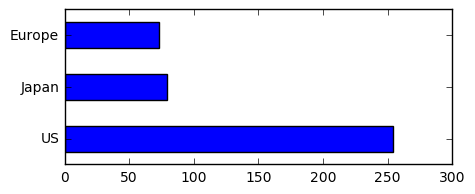

In [6]:
df['Origin'].value_counts().plot(kind = 'barh',figsize=(5, 2));

- *Pie chart* is a popular alternative to the bar plot

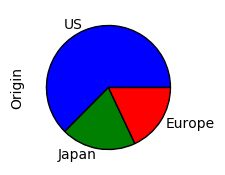

In [7]:
df['Origin'].value_counts().plot(kind = 'pie',figsize=(2, 2));

**Exploring a numerical attribute**.
Numerical attributes could be studied with a richer set of tools. 

- *Line plot* displays all attribute values as consecutive points on a two-dimensional canvas. For example, if value of 76th example is 4, it will be ploted as a point at position (76,4) on the canvas.  

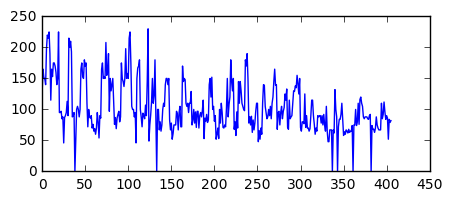

In [8]:
plt.figure(figsize=(5,2))
plt.plot(df['Horsepower']);   # plots the values of the Horsepower attribute

Line plots can be useful if rows in the data set are ordered based on some logical criteria (in the *Auto MPG data* examples are ordered by year).

Any other display of a numerical attribute represents a summary derived from the data. 

- *Histogram* is similar to *Tabulation* -- it displays the frequency of attribute values in small intervals ranging from the minimum to the maximum value of the attribute. 

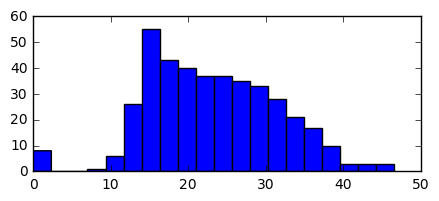

In [12]:
plt.figure(figsize=(5,2))
plt.hist(df['MPG'], bins=20) ;

When using histograms, the number of bins is an important choice that can influence what kind of conclusions can be inferred. For example, from the shown histogram, it could be observed that there are almost 10 examples with MPG equal to zero. This is a very useful information that might indicate the presence of missing data in the data set.

- *Boxplot* is a stylized version of a histogram

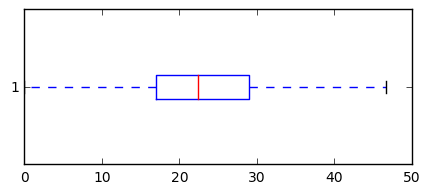

In [10]:
plt.figure(figsize=(5,2))
plt.boxplot(df['MPG'], vert=False);

The following image illustrates how boxplots are calculated.
![Image of Yaktocat](http://www.mathbootcamps.com/wp-content/uploads/boxplot-with-outliers.jpg)

To explain the terminology, let us assume we are given the values of attribute $X$, represented as an array $[X_i], i = 1...N$. Let us assume the array is sorted in the ascending order to create $X-s$. The *k-th percentile* is defined as the value at position $N*k$% within the sorted array. The *median* is the 50th percentile, the *first quartile* equals the 25th percentile and the *third quartile* equals the 75th percentile.

Percentiles, quartiles, and median are examples of properties derived from data, called the *statistics*. The statistics are very useful and popular ways of summarizing properties of data that do not require plotting. The following are two more popular statistics for a numerical attribute.

- *Mean* or *Average*: it is defined as the average value of the attribute
- *Variance* and *standard deviation*: it represents how widely spread are attribute values around its mean.

In [13]:
print 'Mean of Horsepower is:', np.mean(df['Horsepower'])
print 'and standard deviation is:', np.std(df['Horsepower'])
print 'Median is:', np.median(df['Horsepower'])

Mean of Horsepower is: 103.52955665
and standard deviation is: 40.4707260656
Median is: 93.5


### Exploring pairs of attributes
Visualizing pairs of attributes can provide insights that are not possible by studying individual attributes. In particular, they could revel the *dependencies* or *correlations* between the attributes.

**Pairs of numeric attributes**
- *Scatterplots* are related to the line plots. They provide a view at the raw data by representing each example as a point on a 2-dimensional canvas. In particular, if the values of attributes $X_1$ and $X_2$ for 56th example are $(X_{56,1},X_{56,2}) = (3,2)$, then the point is plotted at location $(3,2)$ on the canvas.

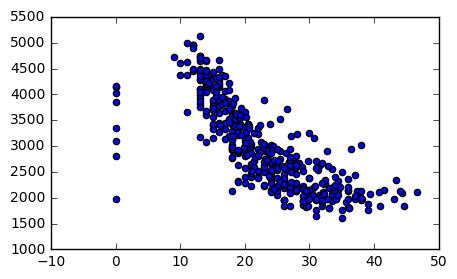

In [14]:
plt.figure(figsize=(5,3))
plt.scatter(df['MPG'],df['Weight']);

- *2D histogram*: for large data sets, the number of points in the plot can become extremely clutered, such that the scatterplot becomes just a pile of points plotted on top of each other. A popular way to address it is to plot a 2-dimensional histogram. Here, a range between the minimum and maximum for the 2 attributes is divided into a grid and the total number of examples belonging to each grid box is recorded and plotted with a heatmap.

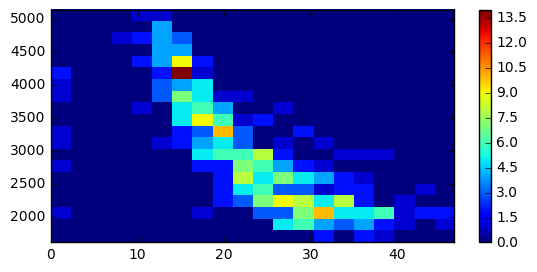

In [15]:
plt.figure(figsize=(6.5,3))
plt.hist2d(df['MPG'],df['Weight'],[20,20]);
plt.colorbar();

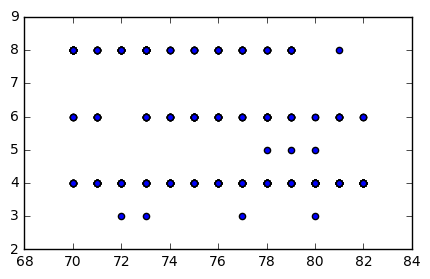

In [16]:
plt.figure(figsize=(5,3))
plt.scatter(df['Model'],df['Cylinders']);

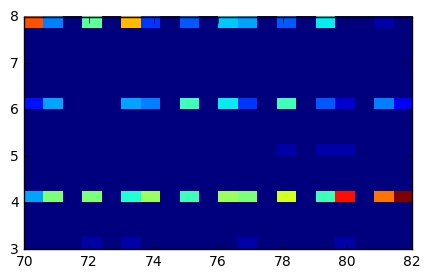

In [17]:
plt.figure(figsize=(5,3))
plt.hist2d(df['Model'],df['Cylinders'],[20,20]);

- *Correlation cefficient*: is a measure of relatedness between two numeric attributes. It ranges between $-1$ and $1$. Values close to 1 indicate that high value of one attribute implies high value of another attribute (*positive correlation*). Values close to $-1$ indicate that high value of one attribute implies low value of another attribute (*negative correlation*). Values around zero indicate that value of one attribute does not reveal much about another attribute. 

In [18]:
print np.corrcoef(df[['MPG','Weight']].T)
print np.corrcoef(df[['Horsepower','Weight']].T)

[[ 1.         -0.78750994]
 [-0.78750994  1.        ]]
[[ 1.          0.84081063]
 [ 0.84081063  1.        ]]


**Pairs of categorical attributes**
- *Cross tabs*: this is similar to 2D histograms. For each unique pair of attribute values the cross tabs are counting the number of examples with such values

In [ ]:
pd.crosstab(df['Model'],df['Origin'])

**Pairs of mixed attributes**
- *Pivot tables*: when we are given one categorical and one numeric attribute, aggregated views of the numeric attribte are possible. In particular, for each categorical value, pivot tables are showing some statistic of the numeric variable.

In [ ]:
df.pivot_table(values=["Horsepower"], 
               index=["Origin"], aggfunc=[np.mean,np.std,np.min,np.max])

### Exploring more than 2 attributes
Ability to visualize more than 2 attributes on a same plot could potentially provide an even better insight than looking at a single attribute or a pair of attributes. This task is very challenging, but there are several popular ways of visualizing such data.
- *Annotated scatterplots*: using size, collor, and shape to visualize the 3rd, the 4th, and even the 5th attribute.

In [ ]:
plt.figure(figsize=(6.5,3))
plt.scatter(df['MPG'],df['Weight'],df['Cylinders']*10,df['Horsepower']);
plt.colorbar();
# Cylinders are represented by size and Horepower by color

- *Small multiples*: showing multiple 2-attribute plots next to each other

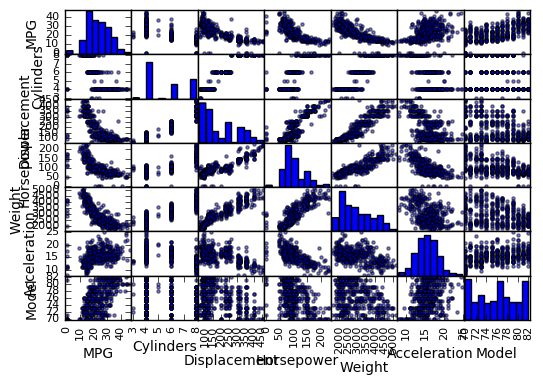

In [66]:
pd.scatter_matrix(df);

- *Heatmaps* of the raw data. See this very nice demonstration: http://stackoverflow.com/questions/14391959/heatmap-in-matplotlib-with-pcolor

- *Crosstabs*

In [ ]:
print pd.crosstab([df['Model'],df['Cylinders']],df['Origin'])
print pd.crosstab(df['Model'],[df['Origin'],df['Cylinders']])

*Pivot tables*

In [ ]:
df.pivot_table(values=["MPG","Cylinders"], 
               index=["Model","Origin"], aggfunc=np.mean)

- *Parallel coordinates*: see http://www.juiceanalytics.com/writing/writing/parallel-coordinates
- *Dimensionality reduction*: representing multi-dimensional examples as 2-dimensional points. Requires knowledge of matrix algebra. See this nice examples:
 - https://blog.luminoso.com/2016/04/06/an-introduction-to-the-conceptnet-vector-ensemble/
 - https://cs.wmich.edu/~yang/research/dembed/
 - http://everynoise.com/engenremap.html

## Data transformations and cleaning

In [ ]:
plt.figure(figsize=(5,2))
x=10**np.random.randn(2000, 1) 
plt.hist(x,20);

In [ ]:
plt.figure(figsize=(5,2))
plt.hist(x,200);

In [ ]:
plt.figure(figsize=(5,2))
plt.hist(np.log10(x),50);